# Analysis of The Beatles Lyrics

In [ ]:
#spacy library to tokenize text
! python -m spacy download en_core_web_md

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
from collections import Counter

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re

import spacy
nlp = spacy.load("en_core_web_md")

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
# spaCy's default stop words
stop_list = list(nlp.Defaults.stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Importing the dataset
beatles = pd.read_excel (r"Beatles-Lyrics.xlsx", names=['ALBUM', 'SONG', 'LYRICS', 'EARLY_LATE', 'COMPOSER', 'YEAR'])

# Exploratory Data Analysis


In [ ]:
beatles.head()

,ALBUM,SONG,LYRICS,EARLY_LATE,COMPOSER,YEAR
0,A. Please Please Me,A Taste of Honey,A taste of honey... tasting much sweeter than ...,Early,McCartney,1963
1,A. Please Please Me,Anna (Go To Him),"Anna, You come and ask me, girl, To set you fr...",Early,Lennon,1963
2,A. Please Please Me,Ask Me Why,I love you Can't you tell me things I want to ...,Early,Lennon,1963
3,A. Please Please Me,Baby It's You,Sha la la la la la la la Sha la la la la la la...,Early,Lennon,1963
4,A. Please Please Me,Boys,"I been told when a boy kiss a girl, Take a tri...",Early,Starr,1963


In [ ]:
beatles["LYRICS"][100]

"It's getting better all the time I used to get mad at my school The teacher's that taught me weren't cool You're holding me down Filling me up with your rules I've got to admit it's getting better A little better all the time I have to admit it's getting better It's getting better since you've been mine Me used to be angry young man Me hiding me head in the sand You gave me the word I finally heard I'm doing the best that I can I've got to admit it's getting better I used to be cruel to my woman I beat her and kept apart from the things that she loved Man I was mean but I'm changing my scene And I'm doing the best that I can I admit it's getting better A little better all the time Yes I admit it's getting better It's getting better since you've been mine..."

In [ ]:
type(beatles["LYRICS"][100])

str

In [ ]:
beatles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ALBUM       186 non-null    object
 1   SONG        186 non-null    object
 2   LYRICS      184 non-null    object
 3   EARLY_LATE  186 non-null    object
 4   COMPOSER    184 non-null    object
 5   YEAR        186 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 8.8+ KB


# Case normalization & punctuation cleanup

In [ ]:
# Change data types to their appropriate type
beatles['LYRICS'] = beatles['LYRICS'].astype("str")

# Make every lyric lowercase
beatles['LYRICS'] =  beatles['LYRICS'].str.lower()

#remove all punctuation
beatles['LYRICS'] = beatles['LYRICS'].str.replace('[^\w\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
#sanity check 
print(beatles["LYRICS"][100])

its getting better all the time i used to get mad at my school the teachers that taught me werent cool youre holding me down filling me up with your rules ive got to admit its getting better a little better all the time i have to admit its getting better its getting better since youve been mine me used to be angry young man me hiding me head in the sand you gave me the word i finally heard im doing the best that i can ive got to admit its getting better i used to be cruel to my woman i beat her and kept apart from the things that she loved man i was mean but im changing my scene and im doing the best that i can i admit its getting better a little better all the time yes i admit its getting better its getting better since youve been mine


# Tokenization


In [ ]:
#Tokenize text
beatles["TOKEN_LYRICS"] = beatles['LYRICS'].apply(word_tokenize)

In [ ]:
beatles.head()

,ALBUM,SONG,LYRICS,EARLY_LATE,COMPOSER,YEAR,TOKEN_LYRICS
0,A. Please Please Me,A Taste of Honey,a taste of honey tasting much sweeter than win...,Early,McCartney,1963,"[a, taste, of, honey, tasting, much, sweeter, ..."
1,A. Please Please Me,Anna (Go To Him),anna you come and ask me girl to set you free ...,Early,Lennon,1963,"[anna, you, come, and, ask, me, girl, to, set,..."
2,A. Please Please Me,Ask Me Why,i love you cant you tell me things i want to k...,Early,Lennon,1963,"[i, love, you, cant, you, tell, me, things, i,..."
3,A. Please Please Me,Baby It's You,sha la la la la la la la sha la la la la la la...,Early,Lennon,1963,"[sha, la, la, la, la, la, la, la, sha, la, la,..."
4,A. Please Please Me,Boys,i been told when a boy kiss a girl take a trip...,Early,Starr,1963,"[i, been, told, when, a, boy, kiss, a, girl, t..."


In [ ]:
#remove stopwords

stopwords = nltk.corpus.stopwords.words('english')

beatles['TOKEN_LYRICS'] = beatles['LYRICS'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [ ]:
#sanity check stopwords have been removed
beatles['TOKEN_LYRICS'][0]

'taste honey tasting much sweeter wine dream first kiss feel upon lips taste honey tasting much sweeter wine return yes return ill come back honey kiss awoke heart lingers still though far apart taste honey tasting much sweeter wine return yes return ill come back hell come back honey honey'

In [ ]:
#CountVectorizer to get total word count

vect = CountVectorizer(tokenizer=word_tokenize, stop_words='english')
dtm_tf = vect.fit_transform(beatles['TOKEN_LYRICS']) # Here, tf stands for "term frequency, i.e. counts for each term"
dtm_tf = pd.DataFrame(data = dtm_tf.toarray(), columns=vect.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
dtm_tf

,1234,56789,aaaaah,aaahhh,able,abord,accidents,aches,act,acts,...,young,younger,youoooo,youoooooo,youre,youve,youyouyouyou,zapped,zoo,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
182,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
183,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,2,0,0,0,0
184,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Visualize the most common words

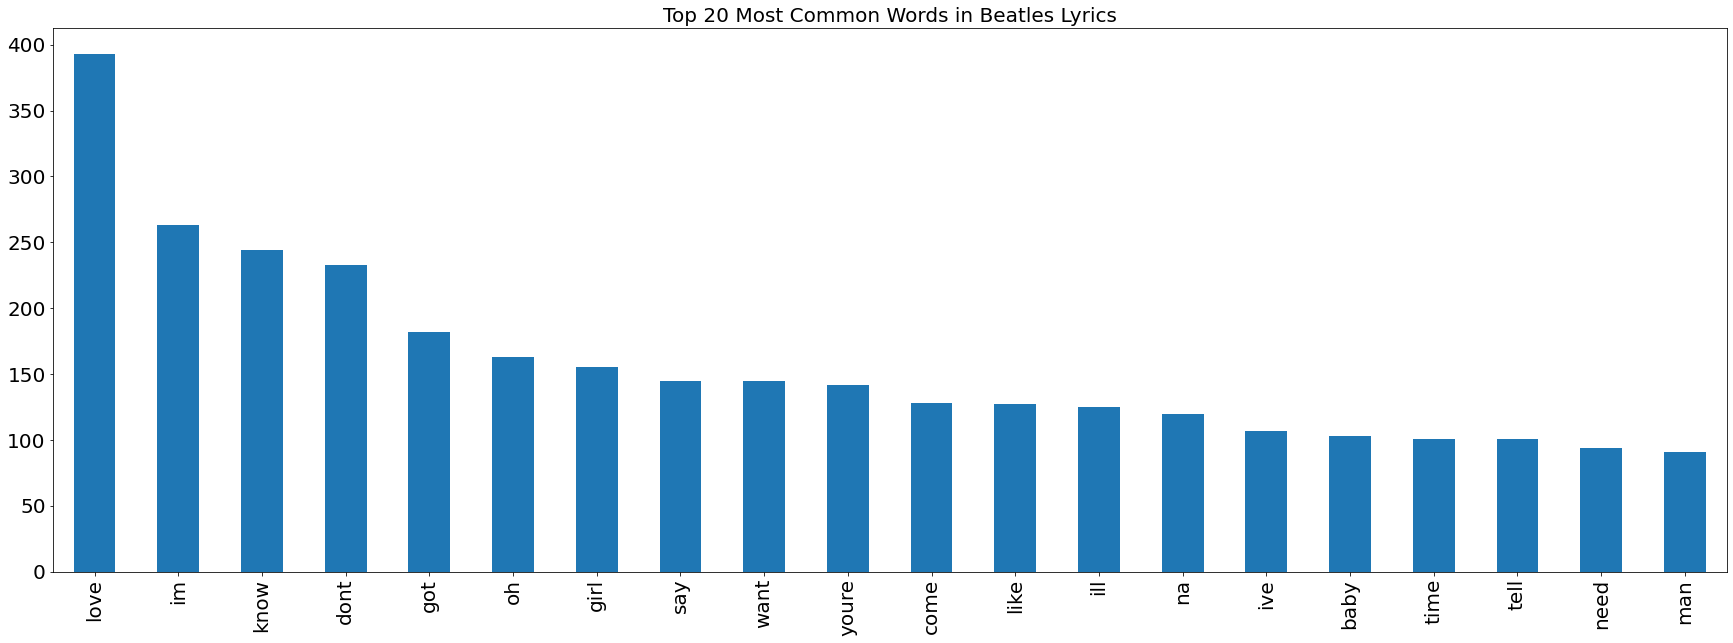

In [ ]:
top_n = 20
# sum the term counts in each column of the dtm_tf data frame and then sort in descending order
sorted_terms = dtm_tf.sum().sort_values(ascending = False)

plt.title("Top {} Most Common Words in Beatles Lyrics".format(top_n), fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sorted_terms[:top_n].plot(kind='bar', figsize=(30,10));

In [ ]:
#TFIDF Vectorizer

tfidf = TfidfVectorizer(stop_words='english', tokenizer=word_tokenize)
tfidf = tfidf.fit(beatles['TOKEN_LYRICS'])
dtm_tfidf = tfidf.transform(beatles['TOKEN_LYRICS']).toarray()
dtm_tfidf = pd.DataFrame(data = dtm_tfidf, columns=vect.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
dtm_tfidf

,1234,56789,aaaaah,aaahhh,able,abord,accidents,aches,act,acts,...,young,younger,youoooo,youoooooo,youre,youve,youyouyouyou,zapped,zoo,zoom
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.140122,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.062536,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
182,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
183,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.045161,0.059528,0.0,0.0,0.0,0.0
184,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


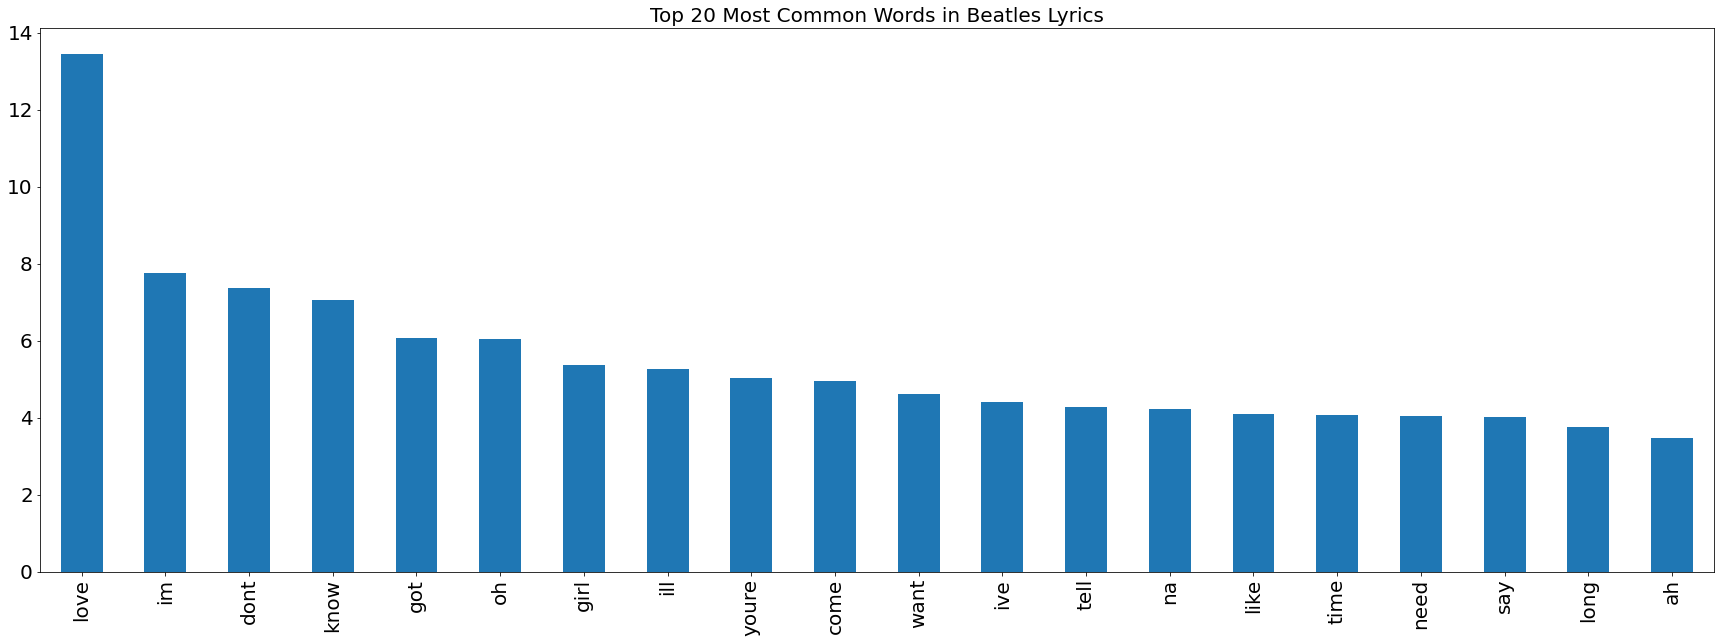

In [ ]:
top_n = 20
# sum the term counts in each column of the dtm_tf data frame and then sort in descending order
sorted_terms = dtm_tfidf.sum().sort_values(ascending = False)

plt.title("Top {} Most Common Words in Beatles Lyrics".format(top_n), fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
sorted_terms[:top_n].plot(kind='bar', figsize=(30,10));

# NearestNeighbor Model
compare how close popular solo John Lennon & Paul McCartney Songs are lyrically to The Beatles


In [ ]:
Lennon = ["Imagine there's no heaven It's easy if you try No hell below us Above us only sky Imagine all the people Living for today"]

# vectorize song using your fitted tfidf vectorizer 
lyric_compare_lennon = tfidf.transform(Lennon).toarray()

song_number = 10
nn=NearestNeighbors(n_neighbors=song_number)
nn.fit(dtm_tfidf)

n_dist, n_ind = nn.kneighbors(lyric_compare_lennon)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
n_dist

array([[1.26113426, 1.29978635, 1.31825791, 1.32396293, 1.32909112,
        1.333411  , 1.34524276, 1.34650741, 1.35748677, 1.35767599]])

In [ ]:
n_ind

array([[127,  85, 109, 173,  35,  34,  97, 103,  73, 157]])

In [ ]:
beatles["LYRICS"][157]

'ah because the world is round it turns me on because the world is round because the wind is high it blows my mind because the wind is high ah love is old love is new love is all love is you because the sky is blue it makes me cry because the sky is blue ah ah ah ah'

In [ ]:
beatles["TOKEN_LYRICS"][73]

'places remember life though changed forever better gone remain places moments lovers friends still recall dead living life ive loved friends lovers one compares memries lose meaning think love something new though know ill never lose affection people things went know ill often stop think life ill love though know ill never lose affection people things went know ill often stop think life ill love life ill love'

In [ ]:
McCartney = ["You'd think that people would have had enough of silly love songs"]

In [ ]:
# vectorize song using your fitted tfidf vectorizer 
lyric_compare_McCartney = tfidf.transform(McCartney).toarray()

song_number = 10
nn=NearestNeighbors(n_neighbors=song_number)
nn.fit(dtm_tfidf)

n_dist, n_ind = nn.kneighbors(lyric_compare_McCartney)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
n_dist

array([[1.17966726, 1.19245857, 1.25863324, 1.28703326, 1.29467319,
        1.29514035, 1.29514035, 1.3194326 , 1.32487449, 1.32910386]])

In [ ]:
n_ind

array([[137,  92,  85,  73,   8, 110, 152, 109,  33,  29]])

In [ ]:
beatles["LYRICS"][29]

'i give her all my love thats all i do and if you saw my love youd love her too i love her  she gives me everything and tenderly the kiss my lover brings she brings to me and i love her  a love like ours could never die as long i have you near me  bright are the stars that shine dark is the sky i know this love of mine will never die and i love her  bright are the stars that shine dark is the sky i know this love of mine will never die and i love her'

In [ ]:
beatles["TOKEN_LYRICS"][110]

'love love love love love love love love love theres nothing cant done nothing sing cant sung nothing say learn play game easy need love need love need love love need love love love love love love love love love theres nothing make cant made noone save cant saved nothing learn time easy need love need love need love love need theres nothing know isnt known nothing see isnt shown nowhere isnt meant need love need love need love love need need love together need us love everybody need love love need need need'

In [ ]:
beatles["TOKEN_LYRICS"][152]

'love love love love love love love love love theres nothing cant done nothing sing cant sung nothing say learn play game easy need love need love need love love need love love love love love love love love love theres nothing make cant made noone save cant saved nothing learn time easy need love need love need love love need theres nothing know isnt known nothing see isnt shown nowhere isnt meant need love need love need love love need need love together need us love everybody need love love need need need'